Continuous Distributions
-----

By The End Of This Session You Should Be Able To:
----


* Simulate and plot continuous distributions
* Calculate probabilities of events based on PDF and CDF
* Model data using continuous distributions


----
Height of the California population
----

We are going to model the height the California population. Given this is a "natural" variable the normal distribution is a good guess. Let's assume the mean height is 177.8 cm and the standard deviation is 10 cm. 

Define that distribution in statistical symbols:

In [83]:
μ = 177.8
σ = 10

Define the distribution in code:

In [84]:
from numpy.random import normal
import scipy.stats as stats

In [85]:
height_normal_dist =μ

To get a sense of the data, let's sample 50 points and plot a histogram of data

In [86]:
import pandas as pd 
import seaborn as sns
%matplotlib inline

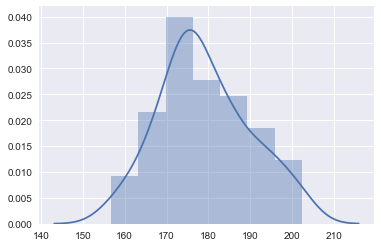

In [87]:
sns.distplot(normal(loc=μ ,scale=σ, size=50))

The true size of the population is 36,434,140. Let's simulate all of that!

[Source](https://suburbanstats.org/population/how-many-people-live-in-california)

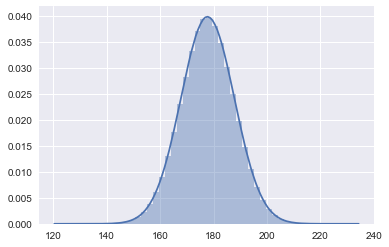

In [88]:
sns.distplot(normal(loc=μ ,scale=σ, size=36_434_140))

That is raw counts. Let's plot the normed version:

`… .hist(normed=True)`

[Source](http://stackoverflow.com/questions/17874063/is-there-a-parameter-in-matplotlib-pandas-to-have-the-y-axis-of-a-histogram-as-p)

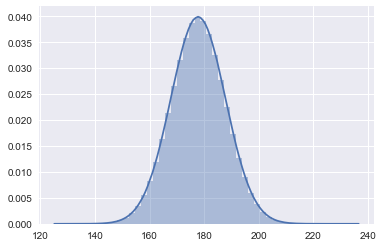

In [89]:
sns.distplot(normal(loc=μ ,scale=σ, size=36_434_140), norm_hist=True)

What is the difference the smaller simulation and the larger simulation?

In [90]:
# The larger simulation a more defined probability distribution shape to it
# The larger distribution will approximate the true parameters better than the smaller sample

----
Calculate probabilities of events based on PDF and CDF
-----

Let's model the distribution with scipy

[Read more here](https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.norm.html)

In [91]:
from scipy.stats import norm

In [92]:
height_normal_dist = norm(loc=μ, scale=σ)

In [93]:
μ

177.8

The probability of having an exact value in a continuous variable is 0

But we can find the probability in a range

Let's find the probability of being 155cm or shorter. 

<br>
<details><summary>
Click here for a hint…
</summary>
use norm.cdf
</details>

In [94]:
'{:%}'.format(height_normal_dist.cdf(155))

'1.130384%'

Finally, let's find out the probability of having a height of between 155cm and 180cm. 

<br>
<details><summary>
Click here for a hint…
</summary>
compute the CDF of 155cm and 180cm and subtract the former from the latter.
</details>

In [95]:
'{:%}'.format(height_normal_dist.cdf(180)-height_normal_dist.cdf(155))

'57.576058%'

----
Modeling Data
----

Let's see qualitatively see how a normal distribution fits some actual data.

I like the Iris dataset, they are pretty so let's load that data from the data folder

In [96]:
iris = pd.read_csv('../data/iris.csv')

In [97]:
iris.shape

(150, 5)

In [98]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Let's select just the petal length

In [99]:
petal_l = iris['petal_length']

Visualize petal length in a histogram

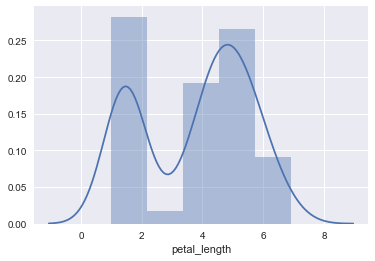

In [100]:
sns.distplot(petal_l)

Does it seem normal to you? Why / Why not?

In [101]:
# NO! It has two peaks, bimodal distribution

Fit a normal distribution to petal length (i.e., find estimates for μ and σ)

<details><summary>
Click here for a hint…
</summary>
scipy.stats.fit
</details>

In [115]:
μ, σ = stats.norm.fit(petal_l)

Plot fitted distribution over the original data

In [116]:
import matplotlib.pyplot as plt
import numpy as np

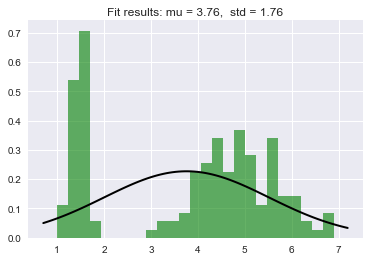

In [117]:
# Plot the histogram.
plt.hist(petal_l, bins=25, normed=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, μ, σ)
plt.plot(x, p, 'k', linewidth=2);
title = f"Fit results: mu = {μ:.2f},  std = {σ:.2f}"
plt.title(title);

Given the best pdf for the data, does it seem normal to you? Why / Why not?

In [105]:
# Not it does not seems normal because there are two distinct groups of data, it is a bimodal distribution

Repeat analysis for sepal width. Did you find something similar or not?

In [106]:
sepal_w = iris.sepal_width

<br>
<br> 
<br>

----

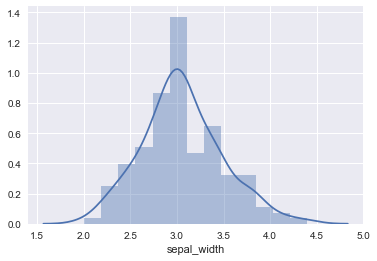

In [107]:
sns.distplot(sepal_w)

In [120]:
μ_s, σ_s = stats.norm.fit(sepal_w)

In [123]:
σ_s

0.43214658007054352

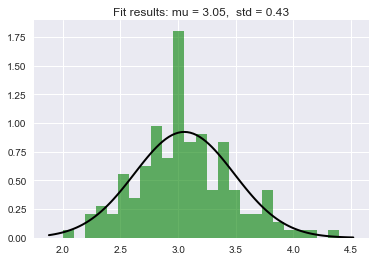

In [125]:
# Plot the histogram.
plt.hist(sepal_w, bins=25, normed=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, μ_s, σ_s)
plt.plot(x, p, 'k', linewidth=2);
title = f"Fit results: mu = {μ_s:.2f},  std = {σ_s:.2f}"
plt.title(title);

In [110]:
# Sepal width DOES look normally distributed. One peak in the data